# [Can You Squeeze the Sheets??](https://thefiddler.substack.com/p/can-you-squeeze-the-sheets)
## January 3 2025

## Problem 

_Two large planar sheets have parallel semicircular cylindrical ridges with radius 1. Neighboring ridges are separated by a distance L ≥ 2. The sheets are placed so that the ridges extrude toward each other, and so that the sheets cannot shift relative to each other in the horizontal direction, as shown in the cross-section below:_

![](./original.webp)

_Which value of L (again, that’s the spacing between ridges) maximizes the empty space between the sheets?_

_To be clear, you are maximizing the volume of empty space per unit area of one flat sheet. In the cross-section shown above, that’s equivalent to maximizing the area of empty space per unit length of one flat sheet._

## Solution

To make this problem a bit easier, we can make a few observations. (1) the horizontal distance between the center of a blue cylinder and the center of the nearest red cylinder is $\frac{L}{2}$ (and vice versa). (2) By symmetry, the horizontal distance between the center of a blue cylinder and the point at which that cylinder touches the red cylinder is $\frac{L}{4}$. Below is a crude image to help illustrate.

![](./solution.png)

Using these facts, we can model the area of empty space between the sheets as follows:

$$
A(L) = \frac{L}{2} \cdot h(L) - \frac{\pi}{2}
$$
where $h(L)$ is the verticlal distance between the sheets. To find $h(L)$, we can use the fact that point where the cylinders tough is a horizontal distance of $\frac{L}{4}$ from the center of either cylinder and is at a vertical distance of #\frac{h(L)}{2}$.

$$
1 = x^2 + y^2 \implies 1 = \left(\frac{L}{4}\right)^2 + \left(\frac{h(L)}{2}\right)^2
$$

$$
\implies h(L) = 2 \sqrt{1 - \left(\frac{L}{4}\right)^2}
$$

Plugging this back into the equation for $A(L)$, we get

$$
A(L) = L \sqrt{1 - \left(\frac{L}{4}\right)^2} - \frac{\pi}{2}
$$

To maximize this, we can take the derivative of the ratio of the area and the length $L$ and set it equal to zero.

$$
\frac{d}{dL} \left( \frac{A(L)}{L} \right) = \frac{\pi}{2L^2} - \frac{L}{4\sqrt{16 - L^2}} = 0
$$

Sparing the algebra, we find that $L \approx 2.6581$. But we should check that this is a maximum. To do this, we can observe the graph below and verity that $L = L \approx 2.6581$ is indeed a maximum.


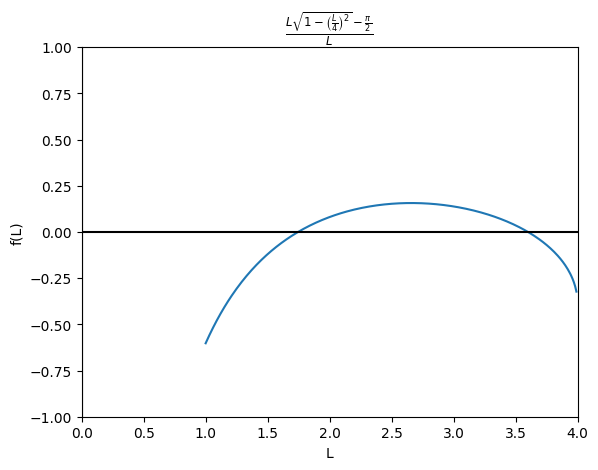

In [8]:
from matplotlib import pyplot as plt

# plot L \sqrt{1 - \left(\frac{L}{4}\right)^2} - \frac{\pi}{2}
def f(L):
    return (L * (1 - (L / 4) ** 2) ** 0.5 - 3.141592653589793 / 2)/L

L = [i / 100 for i in range(100, 400)]
plt.plot(L, [f(l) for l in L])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(0, 4)
plt.ylim(-1, 1)
plt.xlabel('L')
plt.ylabel('f(L)')
plt.title(r'$\frac{L \sqrt{1 - \left(\frac{L}{4}\right)^2} - \frac{\pi}{2}}{L}$')

plt.show()

Finally, to get our answer, we plug $L = 2.6581$ back into the equation for $A(L)/L$ to get:

$$
\frac{A(2.6581)}{2.6581} = \sqrt{1 - \left(\frac{2.6581}{4}\right)^2} - \frac{\pi}{5.3162} \approx 0.1563
$$

So roughly $15.63\%$ of the area of one sheet is empty space.

## Extra Credit

_Instead of cylindrical ridges, now suppose the sheets have any number (greater than zero) of hemispherical deformations with radius 1 that extrude toward each other. This time, the sheets need not be the same as each other._

_As before, the distance between the centers of any two deformations on the same sheet must be at least 2. What is the minimum empty space, again expressed as volume per unit area of one flat sheet?_

## Extra Credit Solution

I have no idea how to verify the particular configuration that minimized the empty space but I'm going to conjecture that it's the same configuration that minimizes the empty space in a standard sqhere packing problem in 3D. In this case, the configuration starts as a hexagonal packing of the spheres (except that we may permit some space between adjecent spheres in this case), and then in the middle of each triangle formed by three adjecent spheres, you stack a sphere on top. In this way, you can construct another layer, which is also hexagonally packed. With that, let's find an expression for the volume of empty space and minimize it.

$$
V_{prism}(L) = \frac{L}{2} \cdot \frac{L \sqrt{3}}{2} \cdot h(L) = \frac{L^2 \sqrt{3}}{4} \cdot h(L)
$$

The triangle would include 3 $\frac{1}{6}$ sections of each hemisphere on the lower sheet and the entire hemisphere on the upper sheet.
$$
V_{fill} = \frac{1}{2} \left[ 3 \cdot \frac{1}{6} \cdot \frac{4\pi}{3} + \frac{4\pi}{3} \right] = \pi
$$

$$
V_{empty}(L) = V_{prism}(L) - V_{fill} = \frac{L^2 \sqrt{3}}{4} \cdot h(L) - \pi
$$

Now we just need to compute the value $h(L)$. We know that the top hemisphere's centroid coincides with the middle of the triangle, which would be a distance $\frac{L}{\sqrt{3}}$ from any corner of the triangle. Additionally, the point of contact between the top hemisphere and the lower hemispheres should be along the plane of the triangular prism formed by the centroid meeting the corners of the triangle. Employing the same logic as the first part, we can then deduce that the distance along this plane (between the centroid and corner) where the two spheres meet is half of the distance between the centroid and corner. This gives us the following equation:

$$
1 = x^2 + y^2 \implies 1 = \left(\frac{L}{2\sqrt{3}}\right)^2 + \left(\frac{h(L)}{2}\right)^2
$$

$$
\implies h(L) = 2 \sqrt{1 - \left(\frac{L}{2\sqrt{3}}\right)^2} = \sqrt{4 - \frac{L^2}{3}}
$$

Plugging this back into the equation for $V_{empty}(L)$, we get

$$
V_{empty}(L) = \frac{L^2 \sqrt{3}}{4} \cdot \sqrt{4 - \frac{L^2}{3}} - \pi
$$

Recall we want to minimize the ratio of the volume of empty space to the area of one sheet. We can write this as

$$
\frac{V_{empty}(L)}{A(L)} = \sqrt{4 - \frac{L^2}{3}} - \frac{4 \pi}{L^2 \sqrt{3}}
$$

Then we just take the derivative and set it equal to zero.

$$
\frac{d}{dL} \left( \sqrt{4 - \frac{L^2}{3}} - \frac{4 \pi}{L^2 \sqrt{3}} \right) = 0
$$

$$
\implies \frac{8 \pi}{\sqrt{3} L^3} - \frac{L}{\sqrt{36 - 3L^2}} = 0
$$

I dodn't bother trying to solve this analytically and I'm not sure it's worth it given that the equation can't be reduced to anything simplier than a quartic equation. Instead, I'll just plug it into a computer and find that the only valid solution is $L \approx 2.7126$, which is strangely close to $e$ but I'm not sure if that's relevant.

Plugging this back into our ration of empty space to sheet area, we find that the minimum value is 

$$
\sqrt{4 - \frac{2.7126^2}{3}} - \frac{4 \pi}{2.7126^2 \sqrt{3}} \approx 0.2579
$$ 

suggesting that the minimum fraction of empty space is about 25.79%.